# Data Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
df1 = pd.read_csv('/content/spam_ham_dataset.csv', engine='python')
df1

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
df1.drop(columns=['Unnamed: 0','label'],inplace=True)
df1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df2 = pd.read_csv('/content/spam.csv',encoding='latin-1')
df2

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df2['label_num'] = df2['v1'].apply(lambda x:1 if x=='spam' else 0)
df2.head()

,v1,v2,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
df2.drop(columns=['v1'],inplace=True)
df2.head()

,v2,label_num
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
# Ensure columns are consistent before concatenation
df2.rename(columns={'v2': 'text'}, inplace=True)

# Vertically stack the two dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Display the last few rows to see data from the second dataframe
display(combined_df.tail())

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


,text,label_num
10738,This is the 2nd time we have tried 2 contact u...,1
10739,Will Ì_ b going to esplanade fr home?,0
10740,"Pity, * was in mood for that. So...any other s...",0
10741,The guy did some bitching but I acted like i'd...,0
10742,Rofl. Its true to its name,0


In the code above:
- We first rename the 'v2' column in `df2` to 'text' to match the column name in `df1`. This is important for vertical stacking.
- `pd.concat([df1, df2], ignore_index=True)` concatenates `df1` and `df2` vertically.
- `ignore_index=True` resets the index of the resulting dataframe.
- `display(combined_df.head())` shows the top rows, which will be from `df1`.
- `display(combined_df.tail())` shows the bottom rows, which will be from `df2`.

In [12]:
combined_df.shape

(10743, 2)

In [13]:
combined_df['label_num'].value_counts()

,count
label_num,
0,8497
1,2246


**Imbalanced Data**

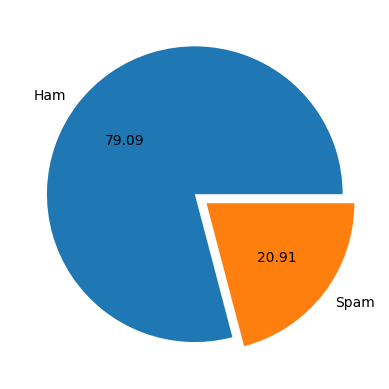

In [14]:
plt.pie(combined_df['label_num'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f',explode=[0,0.1])
plt.show()

# Text Cleaning

In [15]:
for i in range(10):
  print(combined_df['text'][i])
  print('\n')

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls


Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are c

1. Punctuations,numbers and extra spaces removal
2. Stopwords removal
3. Stemming

In [16]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

swords = stopwords.words('english')
ps = PorterStemmer()

def text_preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z]',' ',text)
  text = re.sub(r'\s+',' ',text)
  text = re.sub(r'subject','',text)

  new_text = []
  for word in text.split():
    if word not in swords:
      new_text.append(ps.stem(word))
  text = " ".join(new_text)
  new_text.clear()

  new_text = []
  for word in text.split():
    new_text.append(ps.stem(word))
  text = " ".join(new_text)
  new_text.clear()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
combined_df['modified_text'] = combined_df['text'].apply(text_preprocess)
combined_df

,text,label_num,modified_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend aba da...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...
...,...,...,...
10738,This is the 2nd time we have tried 2 contact u...,1,nd time tri contact u u pound prize claim easi...
10739,Will Ì_ b going to esplanade fr home?,0,b go esplanad fr home
10740,"Pity, * was in mood for that. So...any other s...",0,piti mood suggest
10741,The guy did some bitching but I acted like i'd...,0,guy bitch act like interest buy someth el next...


# Vectorization

In [230]:
bow = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [231]:
x_bow = bow.fit_transform(combined_df['modified_text']).toarray()
x_tfidf = tfidf.fit_transform(combined_df['modified_text']).toarray()
y = combined_df['label_num'].values

In [232]:
x_bow[0,:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [233]:
x_tfidf[0,:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17555069,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [234]:
from sklearn.model_selection import train_test_split
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(x_bow,y,test_size=0.2,random_state=42)
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_tfidf,y,test_size=0.2,random_state=42)

# Model Building and Evaluation: ML Approach

In [235]:
!pip install xgboost

In [236]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [237]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='liblinear',penalty='l1')
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
svm = SVC(kernel='sigmoid',gamma=1.0, probability=True)
xgb = XGBClassifier(n_estimators=50,random_state=2)
knn = KNeighborsClassifier()

## Using BoW

In [238]:
gnb.fit(x_train_bow,y_train_bow)
y_pred_bow = gnb.predict(x_test_bow)
print("accuracy",accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))

accuracy 0.6421591437878083
[[967 746]
 [ 23 413]]
precision 0.35634167385677307


In [239]:
mnb.fit(x_train_bow,y_train_bow)
y_pred_bow = mnb.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))

0.8911121451838064
[[1512  201]
 [  33  403]]
precision 0.6672185430463576


In [240]:
bnb.fit(x_train_bow,y_train_bow)
y_pred_bow = bnb.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))

0.8994881340158213
[[1655   58]
 [ 158  278]]
precision 0.8273809523809523


In [241]:
lr.fit(x_train_bow,y_train_bow)
y_pred_bow = lr.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))

0.952536063285249
[[1695   18]
 [  84  352]]
precision 0.9513513513513514


In [242]:
dt.fit(x_train_bow,y_train_bow)
y_pred_bow = dt.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))

0.8738948348068869
[[1679   34]
 [ 237  199]]
precision 0.8540772532188842


In [243]:
models = {'GaussianNB':gnb,'MultinomialNB':mnb,'BernoulliNB':bnb,'LogisticRegression':lr,'DecisionTreeClassifier':dt,'RandomForestClassifier':rf,'SVC':svm,'XGBClassifier':xgb,'KNeighborsClassifier':knn}

def model_evaluation(x_train,x_test,y_train,y_test,models):
  accuracy_scores = []
  precision_scores = []
  for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test,y_pred))

  return pd.DataFrame({'models':models.keys(),'accuracy_score':accuracy_scores,'precision_score':precision_scores})

In [ ]:
model_evaluation(x_train_bow,x_test_bow,y_train_bow,y_test_bow,models)

,models,accuracy_score,precision_score
0,GaussianNB,0.642159,0.356342
1,MultinomialNB,0.891112,0.667219
2,BernoulliNB,0.899488,0.827381
3,LogisticRegression,0.952536,0.951351
4,DecisionTreeClassifier,0.873430,0.850427
5,RandomForestClassifier,0.956724,0.947781
6,SVC,0.815263,0.543430
7,XGBClassifier,0.941368,0.932961
8,KNeighborsClassifier,0.875291,0.900000


## Using TF-IDF

In [ ]:
model_evaluation(x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf,models)

,models,accuracy_score,precision_score
0,GaussianNB,0.773383,0.470656
1,MultinomialNB,0.951140,0.912718
2,BernoulliNB,0.899488,0.827381
3,LogisticRegression,0.940437,0.925414
4,DecisionTreeClassifier,0.871568,0.857143
5,RandomForestClassifier,0.952536,0.939474
6,SVC,0.952536,0.939474
7,XGBClassifier,0.944160,0.943820
8,KNeighborsClassifier,0.863192,0.986301


**Using VotingClassifier with Best Models and tfidf**


In [244]:
# voting = soft --> average
# voting = hard --> majority
from sklearn.ensemble import VotingClassifier
model1 = VotingClassifier(estimators=[
    ('MultinomialNB', mnb),
    ('LogisticRegression', lr),
    ('RandomForestClassifier', rf),
    ('SVC', svm),
    ('XGBClassifier', xgb),
    ('KNeighborsClassifier', knn)
], voting='soft')


model1.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = model1.predict(x_test_tfidf)
print("accuracy",accuracy_score(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))
print("precision", precision_score(y_test_tfidf, y_pred_tfidf))

accuracy 0.9576547231270358
[[1704    9]
 [  82  354]]
precision 0.9752066115702479


# Model Building and Evaluation: DL Approach

## Tokenization and Padding

In [18]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 732.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 166.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.5 MB/s eta 0:00:00


**Number of words in spam and ham**

In [19]:
combined_df[combined_df['label_num']==1]['modified_text'].apply(lambda x:len(x.split()))

,modified_text
3,43
7,71
10,640
11,38
13,48
...,...
10708,13
10711,23
10718,18
10737,16


In [20]:
combined_df[combined_df['label_num']==0]['modified_text'].apply(lambda x:len(x.split()))

,modified_text
0,30
1,10
2,210
4,28
5,41
...,...
10736,2
10739,5
10740,3
10741,13


In [21]:
print("Spam words count mean: ",combined_df[combined_df['label_num']==1]['modified_text'].apply(lambda x:len(x.split())).mean())
print("Ham words count mean: ",combined_df[combined_df['label_num']==0]['modified_text'].apply(lambda x:len(x.split())).mean())

Spam words count mean:  84.39626001780944
Ham words count mean:  41.8816052724491


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [23]:
vocab_size = 3000
max_len = 120

In [24]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(combined_df['modified_text'])

In [25]:
X_tok = tokenizer.texts_to_sequences(combined_df['modified_text'])
y_tok = combined_df['label_num'].values

In [26]:
X_tok[1]

[13, 42, 188, 32, 39, 72, 1730, 51, 1730, 51]

**Padding to max_len=120**

In [27]:
X_tok = pad_sequences(X_tok,maxlen=max_len,padding='post',truncating='post')
X_tok[:3]

array([[   4,  847,    9,   56,  202, 1409,  327, 1606,   57,  388,  110,
          17,    7,    1,  470,  114,   24,  538,  444,  557,  114,  156,
        1431,    8,  333,   33,   14, 1152, 1685,  881,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  13,   42,  188,   32,   39,   72, 1730,   51, 1730,   51,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,

**Train and test dataset**

In [28]:
from sklearn.model_selection import train_test_split
x_train_tok,x_test_tok,y_train_tok,y_test_tok = train_test_split(X_tok,y_tok,test_size=0.2,random_state=42)

**Validation Dataset**

In [29]:
x_train_final,x_val,y_train_final,y_val = train_test_split(x_train_tok,y_train_tok,test_size=0.15,random_state=42)

## Model Building

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Embedding,LSTM,GRU,Dropout,Dense

In [216]:
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=vocab_size,output_dim=200))
model.add(LSTM(150,return_sequences=False))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [217]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 120, 200)       │       600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 150)            │       210,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,329 (3.13 MB)

 Trainable params: 820,329 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [218]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    start_from_epoch=5,
)

In [219]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [220]:
model.fit(x_train_final,y_train_final,epochs=25,validation_data=(x_val,y_val),callbacks=[early_stop])

Epoch 1/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.7946 - loss: 0.5059 - val_accuracy: 0.8116 - val_loss: 0.4842
Epoch 2/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7813 - loss: 0.5232 - val_accuracy: 0.7915 - val_loss: 0.4807
Epoch 3/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7838 - loss: 0.4937 - val_accuracy: 0.7915 - val_loss: 0.4667
Epoch 4/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.8063 - loss: 0.4689 - val_accuracy: 0.8008 - val_loss: 0.4512
Epoch 5/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.8231 - loss: 0.4168 - val_accuracy: 0.9434 - val_loss: 0.1671
Epoch 6/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9570 - loss: 0.1344 - val_accuracy: 0.9674 - val_loss: 0.1047
Epoch 7/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9793 - loss: 0.0673 - val_accuracy: 0.9659 - val_loss: 0.0954
Epoch 8/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9892 - loss: 0.0427 

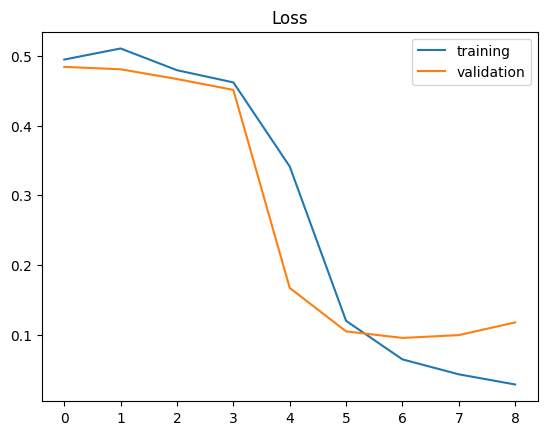

In [221]:
plt.plot(model.history.history['loss'],label='training')
plt.plot(model.history.history['val_loss'],label='validation')
plt.legend()
plt.title("Loss")
plt.show()

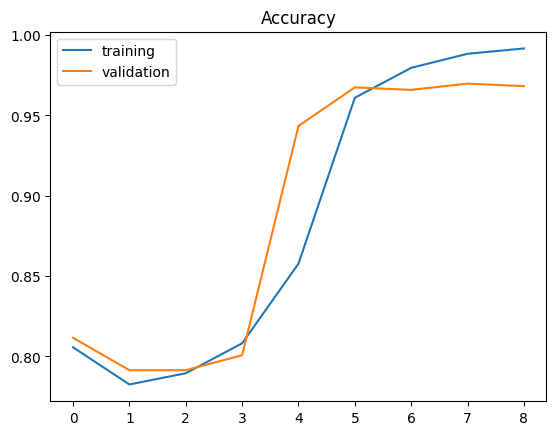

In [222]:
plt.plot(model.history.history['accuracy'],label='training')
plt.plot(model.history.history['val_accuracy'],label='validation')
plt.legend()
plt.title("Accuracy")
plt.show()

In [223]:
def predict(text):
  text = text.lower()
  text = text_preprocess(text)
  text = tokenizer.texts_to_sequences([text]) # Wrap text in a list
  text = pad_sequences(text,maxlen=max_len,padding='post',truncating='post')
  pred = model.predict(text)
  if pred[0][0] > 0.5:
    print("Spam")
    print("Probability:",pred[0][0])
  else:
    print("Not Spam")
    print("Probability",1-pred[0][0])

In [224]:
predict("Your Amazon order #2847392 has been shipped. Expected delivery: tomorrow.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Not Spam
Probability 0.9810883


In [225]:
y_pred = model.predict(x_test_tok)
y_pred = [1 if x>=0.5 else 0 for x in y_pred]
y_pred

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [226]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [227]:
print("Accuracy score:",accuracy_score(y_test_tok,y_pred))
print("Precision score:",precision_score(y_test_tok,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test_tok,y_pred))

Accuracy score: 0.9637040483946021
Precision score: 0.9323671497584541
Confusion matrix:
 [[1685   28]
 [  50  386]]


# Prediction

> ML VotingClassifier is performing better then DL LSTM model

> This might be due to small datatset - around 5.5k samples

**Choosed VotingClassifier model - model1**

In [246]:
for i in range(10):
  sms = input("Enter a message: ")
  sms = text_preprocess(sms)
  sms = tfidf.transform([sms]).toarray()
  pred = model1.predict(sms)
  if pred[0] == 0:
    print("Not Spam")
  else:
    print("Spam")

Enter a message: 2️⃣ Your Amazon order #2847392 has been shipped. Expected delivery: tomorrow.
Not Spam
Enter a message: 3️⃣ Don’t forget to bring your ID for the meeting today. 4️⃣ Hi mom, reached safely. I’ll call you after class.
Not Spam
Enter a message: 5️⃣ Your bank account balance is low. Kindly deposit soon to avoid penalties.
Not Spam
Enter a message: 1️⃣ Congratulations! You’ve won a $1000 Walmart gift card. Click here to claim 👉 [bit.ly/prize]
Spam
Enter a message: 2️⃣ URGENT! Your account has been compromised. Verify your details immediately at www.secure-login123.com
Spam
Enter a message: 4️⃣ You have been selected for a FREE iPhone 15. Click to confirm your delivery address.
Spam
Enter a message: 9️⃣ Thanks for the update. I’ll check and reply soon.
Not Spam
Enter a message: 🔟 Congratulations user! You’ve won a lottery worth ₹10,00,000. Send bank details to claim.
Spam
Enter a message: 1️⃣ Your subscription will expire soon. Renew now to continue uninterrupted service.
No